# Qiskit, Grover

In [2]:
from qiskit import QuantumCircuit

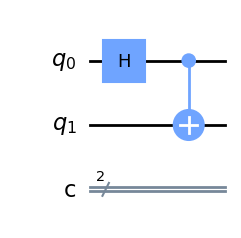

In [13]:
circuit = QuantumCircuit(2,2)

circuit.h(0)
circuit.cnot(0,1)

#circuit.measure([0,1], [0,1])

circuit.draw()

In [7]:
from qiskit import Aer
from qiskit import transpile

backend = Aer.get_backend("qasm_simulator")

job = backend.run(transpile(circuit, backend), shots=1024)

result = job.result()

In [8]:
result

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='5c35bba6-a720-4ed3-93dd-1adfe5c6b9bd', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 535, '0x3': 489}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-117', qreg_sizes=[['q', 2]]), status=DONE, seed_simulator=1850895615, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 8, 'sample_measure_time': 0.00047709, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.001893643)], date=2023-05-16T12:47:37.768390, status=COMPLETED, header=None, metadata={'time_taken_execute': 0.001938138, 'mpi_rank': 0, 'num_mpi_process

In [9]:
result.get_counts()

{'00': 535, '11': 489}

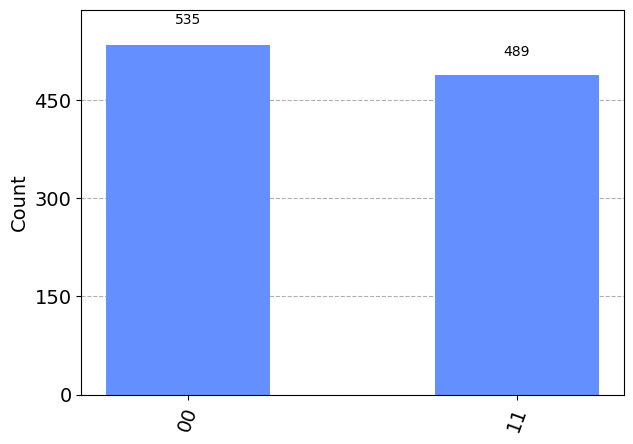

In [10]:
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts())

In [14]:
backend = Aer.get_backend("unitary_simulator")

result = backend.run(transpile(circuit, backend)).result()

print(result.get_unitary(circuit, decimals=3))

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [15]:
backend = Aer.get_backend("statevector_simulator")

result = backend.run(circuit).result()

print(result.get_statevector(circuit, decimals=3))

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2))


## 2-bit Grover for 11

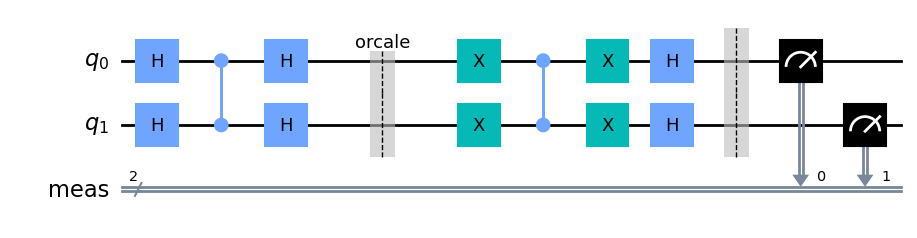

In [18]:
grover_11 = QuantumCircuit(2)

grover_11.h([0,1])
grover_11.cz(0,1)
grover_11.h(range(2))
grover_11.barrier(label="orcale")

grover_11.x([0,1])
grover_11.cz(0,1)
grover_11.x([0,1])
grover_11.h([0,1])

grover_11.measure_all()

grover_11.draw()

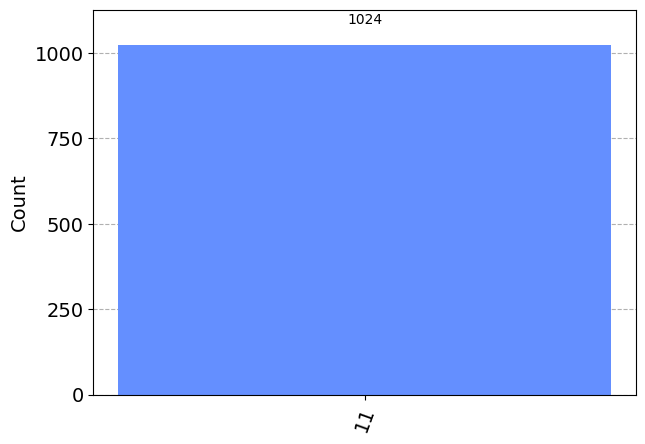

In [19]:
backend = Aer.get_backend("qasm_simulator")

result = backend.run(transpile(grover_11, backend), shots=1024).result()

plot_histogram(result.get_counts())

## 4-bit Grover for 1111

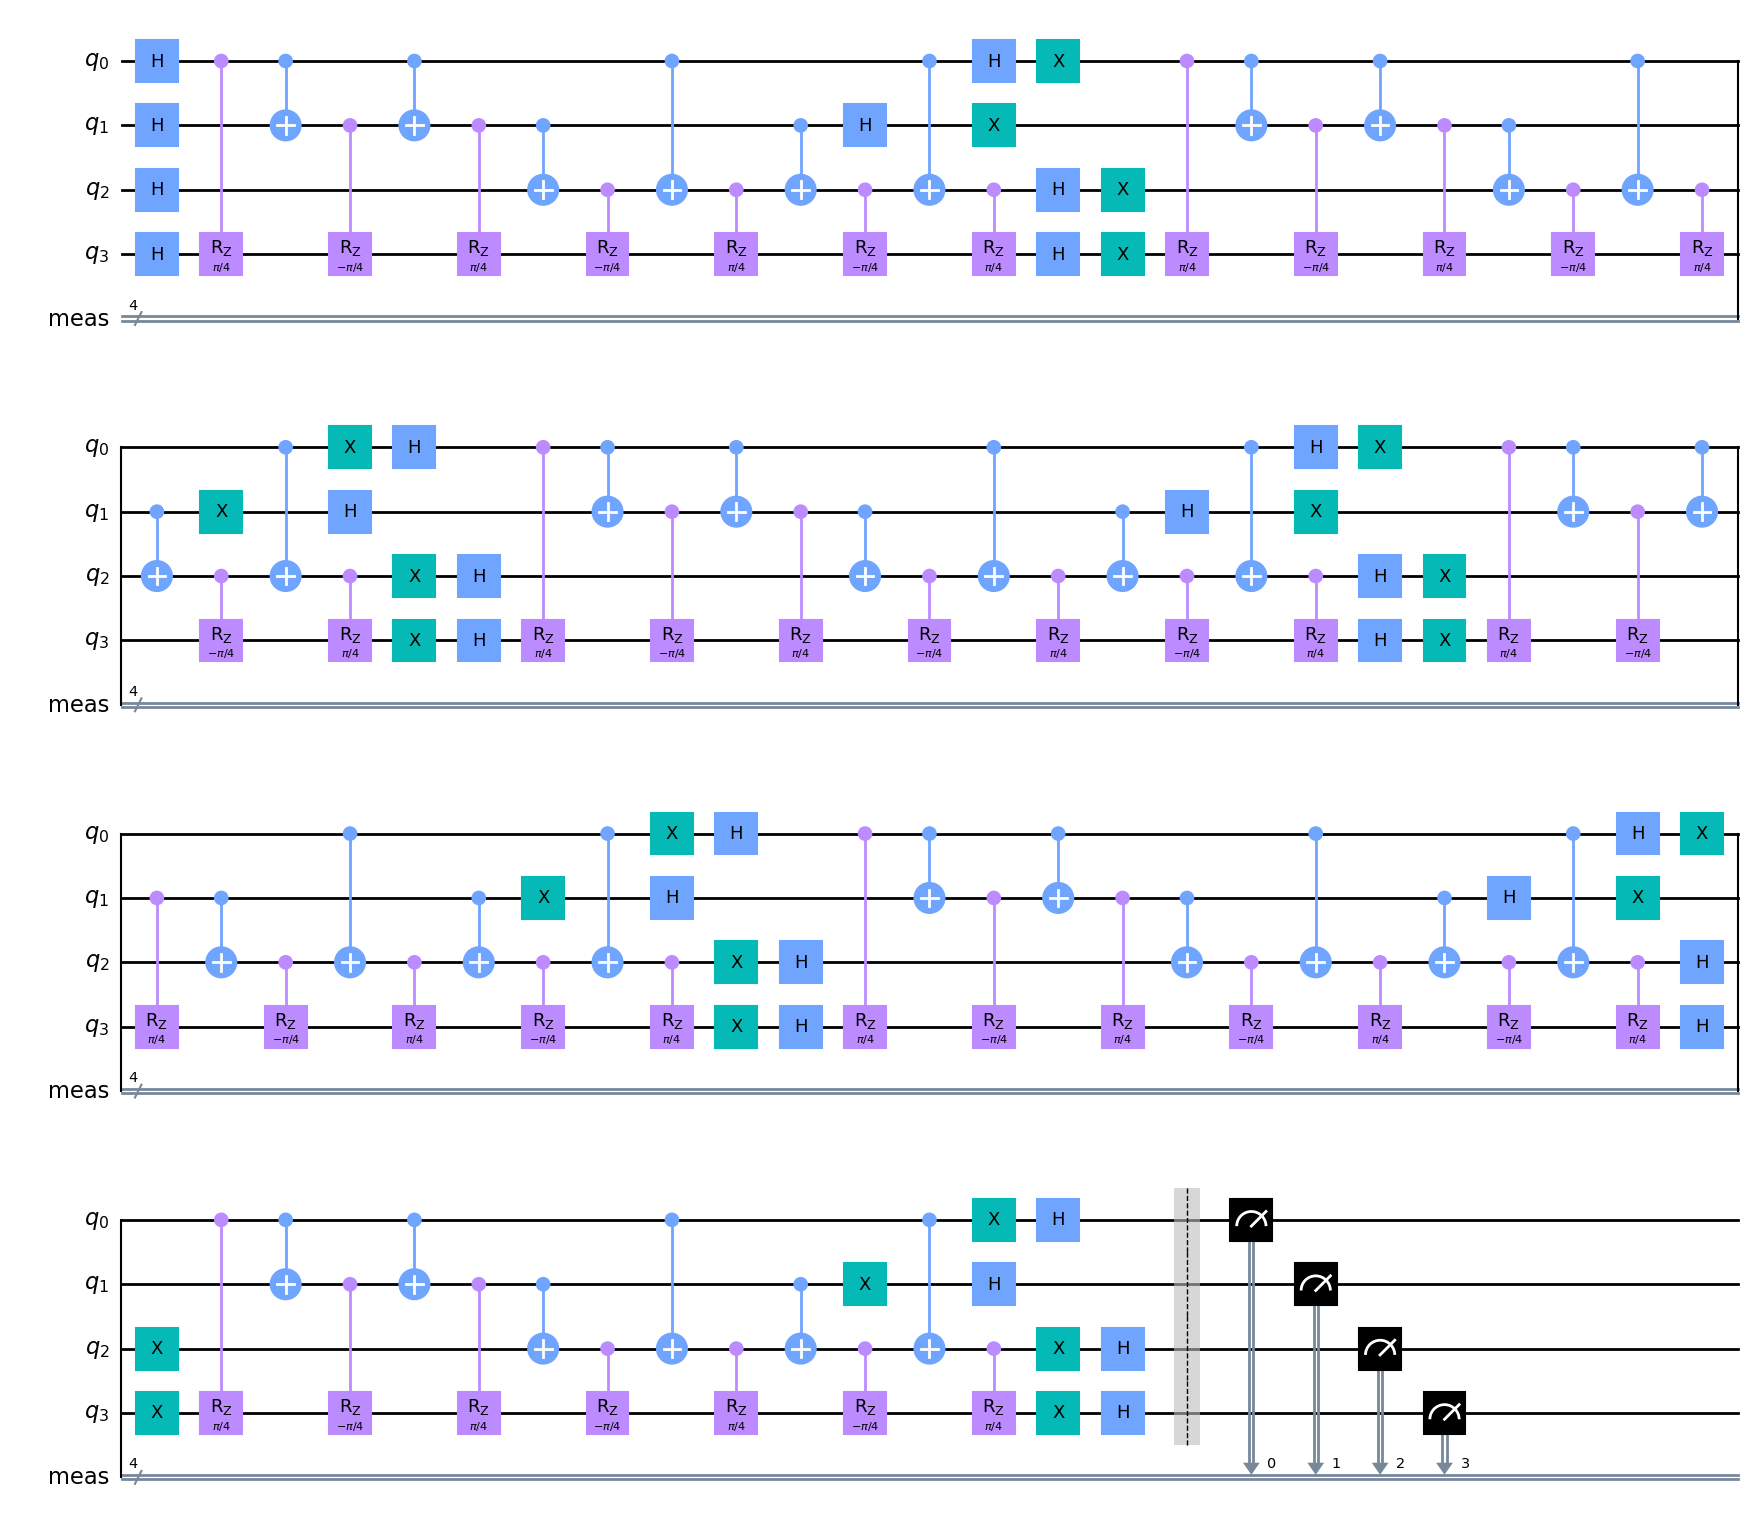

In [23]:
from math import pi

grover_1111 = QuantumCircuit(4)

grover_1111.h(range(4))

def cccZ():
    grover_1111.crz(pi/4, 0, 3)
    grover_1111.cx(0,1)
    grover_1111.crz(-pi/4, 1, 3)
    grover_1111.cx(0,1)
    grover_1111.crz(pi/4, 1, 3)
    grover_1111.cx(1, 2)
    grover_1111.crz(-pi/4, 2, 3)
    grover_1111.cx(0,2)
    grover_1111.crz(pi/4, 2, 3)
    grover_1111.cx(1,2)
    grover_1111.crz(-pi/4, 2, 3)
    grover_1111.cx(0,2)
    grover_1111.crz(pi/4, 2, 3)
    
cccZ()

grover_1111.h(range(4))
grover_1111.x(range(4))

cccZ()

grover_1111.x(range(4))
grover_1111.h(range(4))

cccZ()

grover_1111.h(range(4))
grover_1111.x(range(4))

cccZ()

grover_1111.x(range(4))
grover_1111.h(range(4))

cccZ()

grover_1111.h(range(4))
grover_1111.x(range(4))

cccZ()

grover_1111.x(range(4))
grover_1111.h(range(4))


grover_1111.measure_all()

grover_1111.draw()


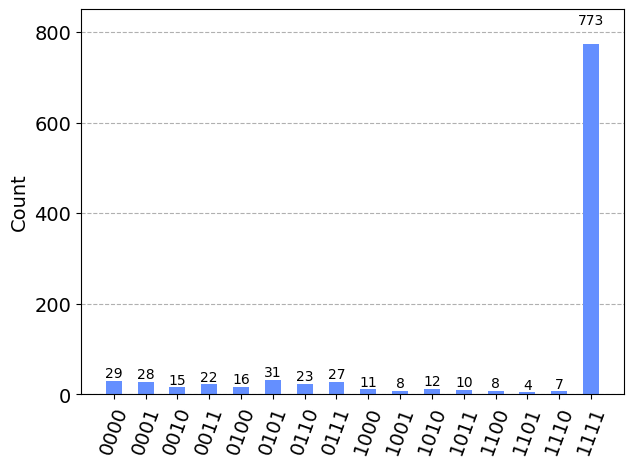

In [24]:
backend = Aer.get_backend("qasm_simulator")

result = backend.run(transpile(grover_1111, backend), shots=1024).result()

plot_histogram(result.get_counts())

## Grover in Qiskit

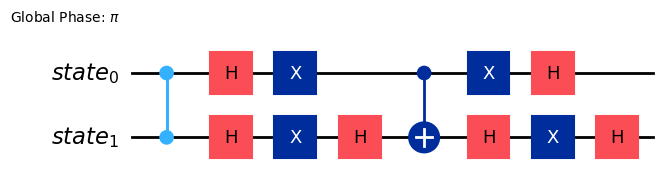

In [1]:
from qiskit import QuantumCircuit
from qiskit_algorithms import AmplificationProblem

good_state = ['11']

oracle = QuantumCircuit(2)
oracle.cz(0,1)

problem = AmplificationProblem(oracle, is_good_state=good_state)

problem.grover_operator.decompose().draw()

In [2]:
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler

grover = Grover(sampler=Sampler())
result = grover.amplify(problem)

print(result.oracle_evaluation)
print(result.top_measurement)

True
11


In [14]:
!pip install tweedledum

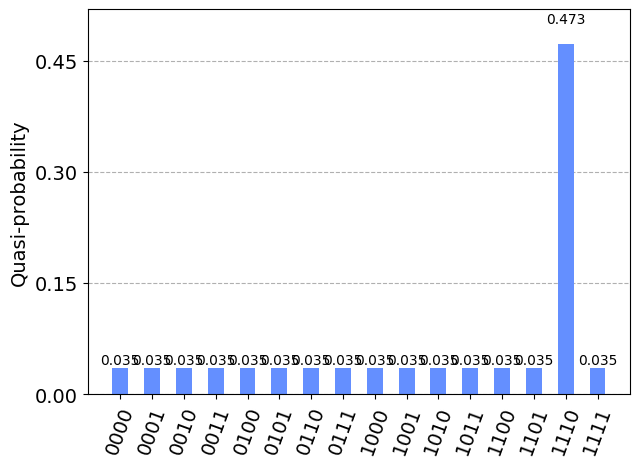

In [5]:
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.phase_oracle import PhaseOracle

expression = "(w ^ x) & ~(y ^ z) & (x & y & z)"

oracle = PhaseOracle(expression)
problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
plot_histogram(result.circuit_results[0])

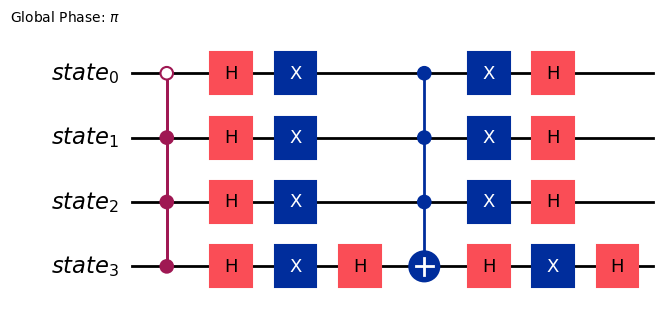

In [6]:
problem.grover_operator.decompose().draw()